# Review data and enhance quality

***

## Project Description

Customer Experience relies on:

    Net Promoter Score (student’s NPS upon closing each claim);
    Claim-to-cash time (time from submission to paying claims);
    Accuracy of payment (% of claims that reopened after closure to fix remittance).

Back-Office Operations relies on:

    Claims Processed per Team Member (volume/ FTEs);
    Fraudulent Claim Payments ($ paid to claims that were later discovered to not have been eligible for rebate);
    Employee Satisfaction Score (measured weekly to gauge employee engagement).

You will need to choose KPI-relevant data extracts from the available systems, as per the previous information (i.e., Claims Case System, Payment System, Fraud Management System, Employee Satisfaction Scores, and/ or Net Promoter Score). You will then need to enhance the data quality in order to prepare to build the dashboard. The key performance indicators identified in the previous task can be used as a starting point for considering data sources.

Review all the available data as per the activities below to guide you to prepare for designing the dashboard, and to answer four related questions: 

    Q1: Which data set pair (within the list provided) is not required to inform and calculate the key performance indicators of Net Promotor Score, Claim-To-Cash Time, Accuracy of Payment, Claims Processed Per Team Member, Fraudulent Claim Payments and Employee Satisfaction Score? 

    Q2: Using the remaining data sets, what is the recommended reporting time period for all KPIs? (Enhance data quality by removing unneeded data, deduplication, and ensuring fields are optimised for calculations. Keep the quality data ready for the next task and answer the remaining questions in this task.)

    Q3: After improving the data quality, what is the number of employees (FTEs) working in the Back-Office during the week starting 21 March 2021 (week 13)? 

    Q4: After improving the data quality, what is the number of claims that were processed during the week starting 28 March 2021 (week 14)? 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("NPS Data.csv",parse_dates=['Date'])

In [3]:
df

,SPID,Date,Claim Outcome,Promoter Score,Promoter Reason,Other,Data Supplier,Comments
0,SNP000008773,2020-10-09,Settled,9,CSE,NaN,4,
1,SNP000040607,2021-04-02,Declined,7,OOO,Aptent torquent auctor tempor turpis scelerisq...,4,
2,SNP000065851,2020-06-27,Settled,6,CSE,NaN,4,
3,SNP000302434197,2021-03-22,Declined,4,COT,NaN,3,Mi placerat praesent lorem sollicitudin nostra...
4,SNP00032039115,2021-04-23,Declined,4,OOO,Placerat class bibendum leo etiam consectetur ...,4,
...,...,...,...,...,...,...,...,...
3589,SNP999068285,2020-10-14,Settled,10,COT,NaN,3,
3590,SNP999108095712,2020-12-27,Settled,10,CPF,NaN,4,
3591,SNP99911216814,2020-05-22,Settled,9,CSE,NaN,3,
3592,SNP999201678169,2020-05-27,Declined,4,COT,NaN,4,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SPID             3594 non-null   object        
 1   Date             3594 non-null   datetime64[ns]
 2   Claim Outcome    3594 non-null   object        
 3   Promoter Score   3594 non-null   int64         
 4   Promoter Reason  3594 non-null   object        
 5   Other            745 non-null    object        
 6   Data Supplier    3594 non-null   int64         
 7   Comments         3594 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 224.8+ KB


In [5]:
df.describe()

,Promoter Score,Data Supplier
count,3594.00,3594.00
mean,5.86,3.49
std,2.99,0.50
min,0.00,3.00
25%,4.00,3.00
50%,6.00,3.00
75%,9.00,4.00
max,10.00,4.00


In [6]:
df.columns

Index(['SPID', 'Date', 'Claim Outcome', 'Promoter Score', 'Promoter Reason', 'Other', 'Data Supplier', 'Comments'], dtype='object')

### Groupby Function

In [7]:
df2 = df.groupby("Claim Outcome").mean()
df2

,Promoter Score,Data Supplier
Claim Outcome,,
Declined,2.78,3.49
Processing,5.48,3.56
Settled,7.53,3.48


## Data Visualization

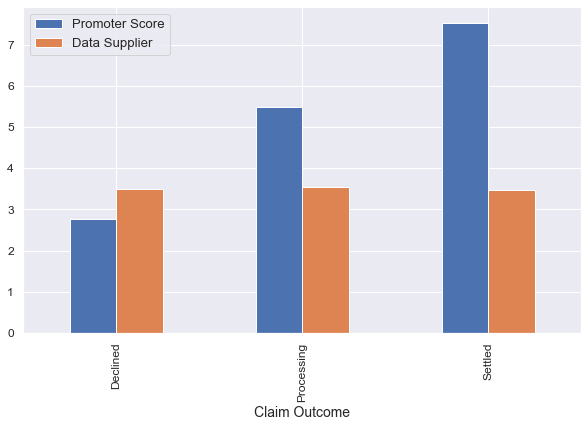

In [8]:
df2.plot(kind="bar", figsize=(10,6))
plt.show()

### Univariate Data Exploration

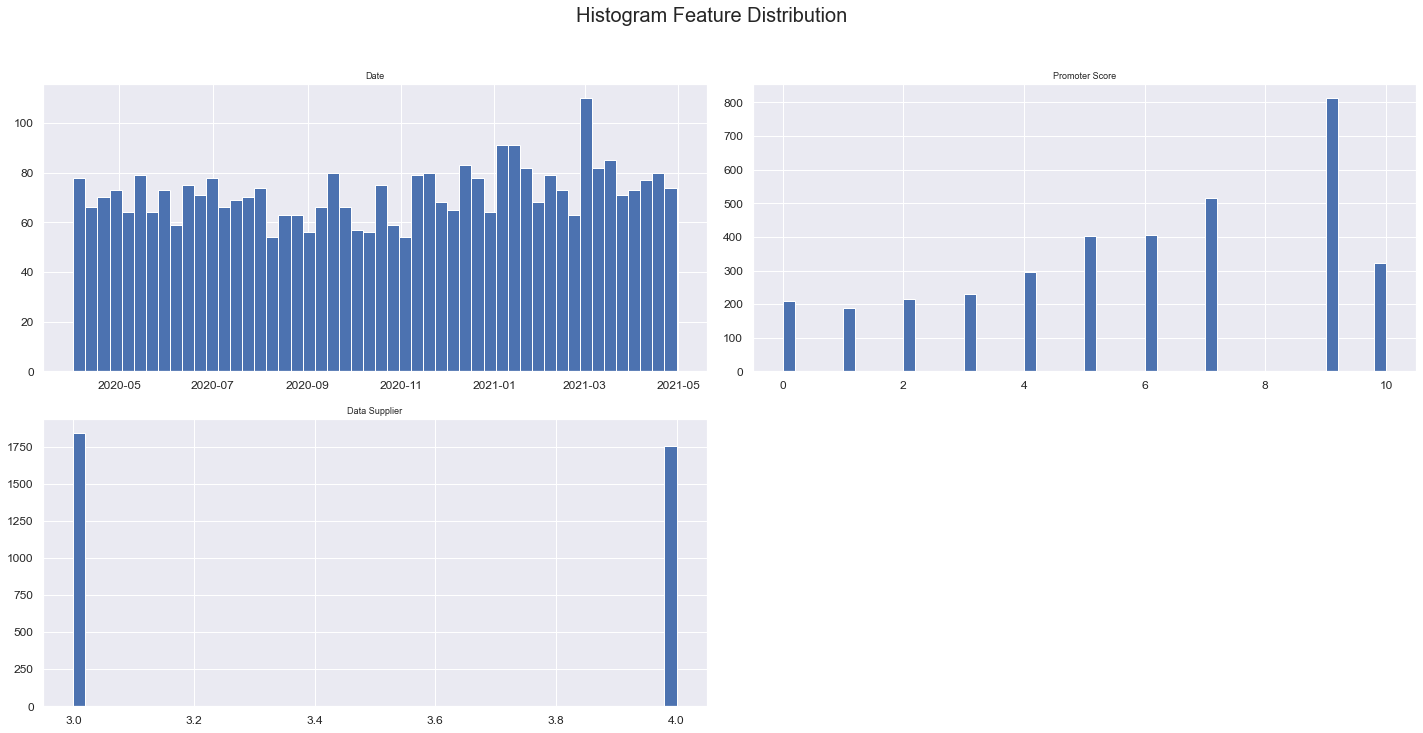

In [9]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

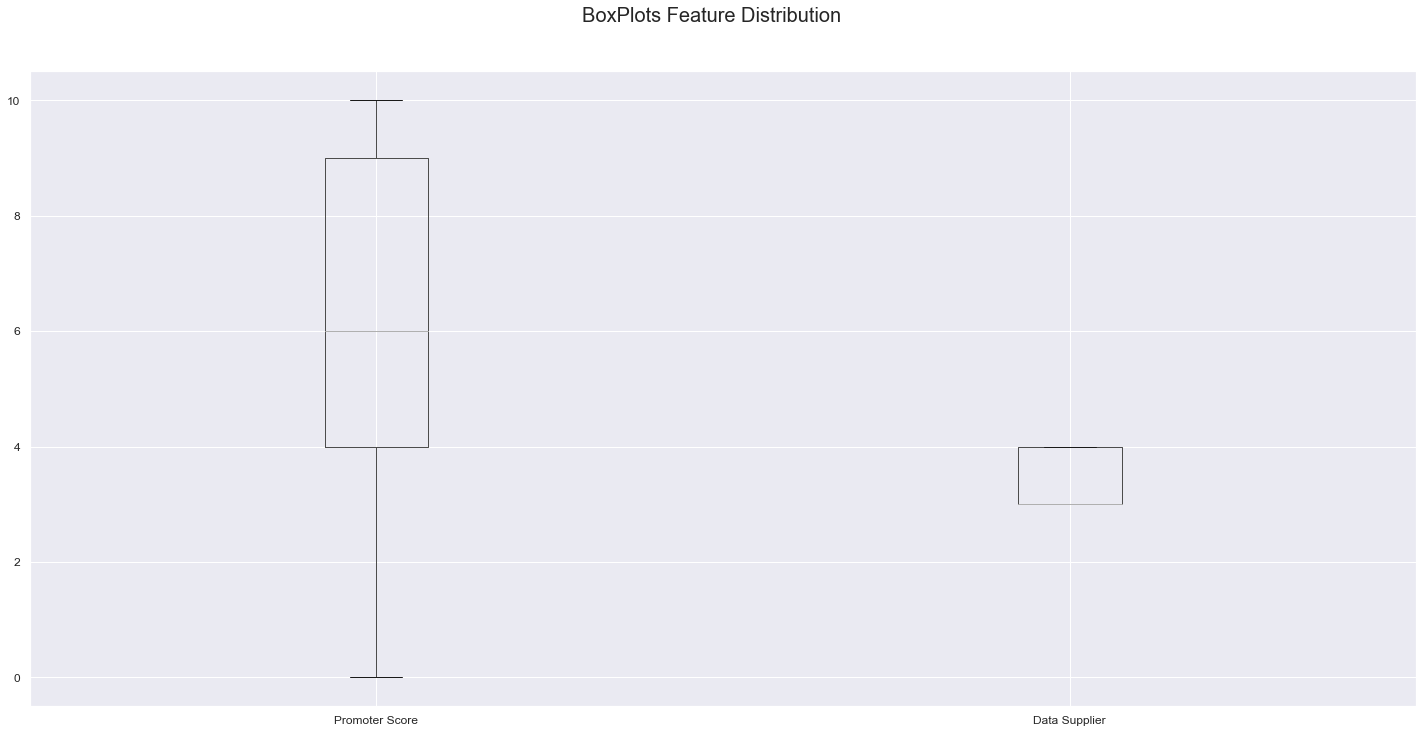

In [10]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

#### Python code done by Dennis Lam